In [519]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Configura tu clave de API aquí para el geolocalizador esta KEY es de https://app.ipgeolocation.io/
API_KEY = ""


#Cargar los datos del archivo shapefile de los países del mundo usando Geopandas:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Crear un DataFrame de Pandas con la cantidad 0 para cada país del mundo:
data = pd.DataFrame({'Country': world['iso_a3'], 'Value': 0})

#lee el archivo csv 
#el archivo debe de estar separado por comas
ips = pd.read_csv('IPs.csv', sep=',', header=0, names=['IP', 'count'])

# Creamos una lista vacía para almacenar los valores de los paises posteriormente
ips['Country'] = 0

# Define una función que tomará una dirección IP y devolverá su ubicación
def geolocalizar_ip(ip):
    url = "https://api.ipgeolocation.io/ipgeo?apiKey=%s&ip=%s" % (API_KEY, ip)
    response = requests.get(url)
    if response.status_code == 200:
        datos_json = response.json()
        # Procesa los datos JSON para obtener la ubicación
        ubicacion = datos_json.get("city")
        pais = datos_json.get("country_name")
        country_code3 = datos_json.get("country_code3")
        # Devuelve la ubicación 
        return country_code3
    else:
        # Devuelve None si la solicitud no tuvo éxito
        return None



In [520]:
# iteremos separando por indices y columnas con iterrows el dataframe ips
for ind,fil in ips.iterrows():
    country = geolocalizar_ip(fil[0])
    
    #comprobamos sí existe el país
    if  country != None:
        ips.loc[ind, 'Country'] = country


#data[data['Country'] == 'USA']
ips

,IP,count,Country
0,200.6.248.251,56710,GTM
1,200.49.177.227,18589,GTM
2,101.50.75.39,13257,PAK
3,190.74.113.85,8902,VEN
4,89.218.158.78,8057,KAZ
...,...,...,...
72,185.104.251.143,1020,RUS
73,185.104.251.147,1020,RUS
74,185.104.251.156,1020,RUS
75,185.189.14.77,1020,RUS


In [521]:
#sumamos la cuenta de los paises duplicados
sum_count_country = ips.groupby('Country').sum('count').reset_index()
sum_count_country = sum_count_country.sort_values('count', ascending=False)
sum_count_country


,Country,count
13,RUS,118442
4,GTM,75299
8,MEX,17167
10,PAK,15738
5,IND,14131
6,IRN,13263
17,VEN,11956
7,KAZ,9732
1,CHN,6775
9,MLI,3480


In [522]:
#iteramos la tabla con la suma total segun los paises 
for ind,fil in sum_count_country.iterrows():

    #iteramos la tabla data para agregar los valores de la suma total respecto a los paises
    for ind2,fil2 in data.iterrows():
        if data.loc[ind2, 'Country'] ==  fil[0]:
             data.loc[ind2, 'Value'] = fil[1] 

#data[data['Country'] == 'GTM']         
        

In [523]:
#Unir los datos del DataFrame con los datos del archivo data de los países del mundo usando la columna "iso_a3":
world_data = world.merge(data, left_on='iso_a3', right_on='Country')

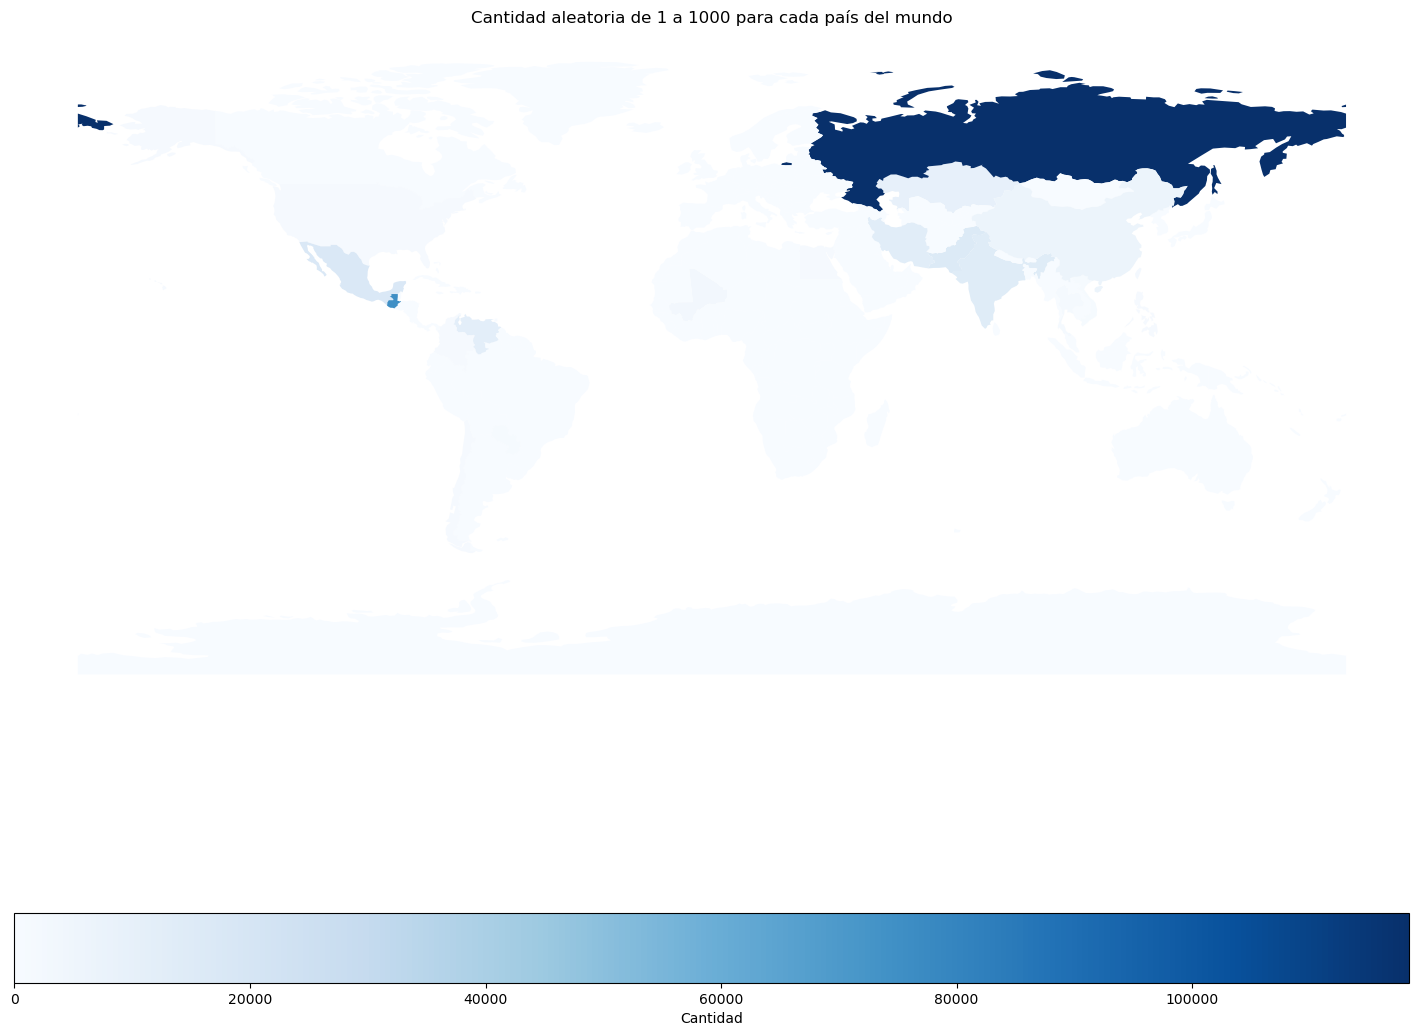

In [527]:


#Crear una figura y un eje para el mapa:
fig, ax = plt.subplots(1, 1, figsize=(18,18))


#Dibujar el mapa con el color de los países cambiando en función de la proporción de la cantidad:
world_data.plot(column='Value', cmap='Blues', ax=ax, legend=True, 
                legend_kwds={'label': "Cantidad", 'orientation': "horizontal"})

#Agregar título y etiquetas a los ejes:
ax.set_title("Cantidad aleatoria de 1 a 1000 para cada país del mundo")
ax.axis('off')

plt.show()

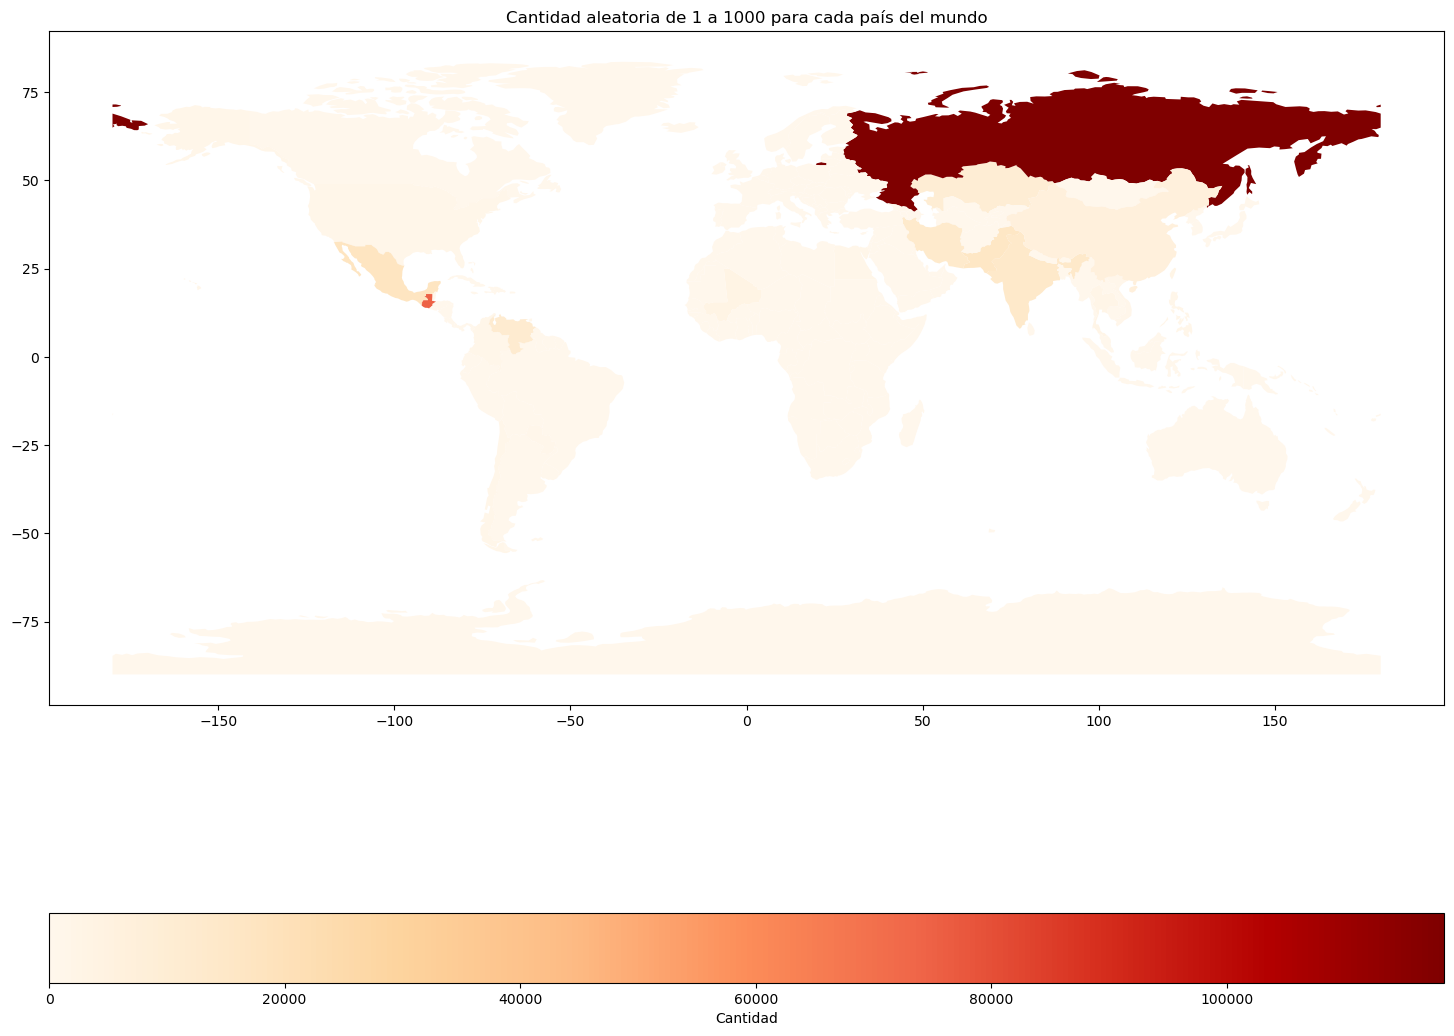

In [528]:
#Crear una figura y un eje para el mapa:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))

#Dibujar el mapa con el color de los países cambiando en función de la proporción de la cantidad:
world_data.plot(column='Value', cmap='OrRd', ax=ax, legend=True, 
                legend_kwds={'label': "Cantidad", 'orientation': "horizontal"})

#titulo de la grafica
ax.set_title("Cantidad aleatoria de 1 a 1000 para cada país del mundo")

plt.show()